## Discription
This code implement mean filter

In [28]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

First, I need to download an image in .jpg format for work. 

In [29]:
image = cv2.imread("test-2.jpeg", cv2.IMREAD_GRAYSCALE)

2. Next, create the noisy image by adding handmade noise.

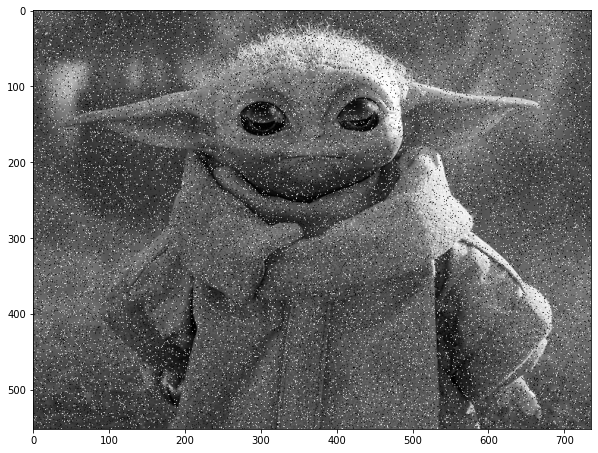

In [30]:
# width, height = image.shape
# noise = np.random.normal(0,20, (width, height)).astype(np.uint8)
# noisy_image = image + noise

def salt_and_pepper(image): 
    col, row = image.shape
    number_of_pixels = np.random.randint(10000,30000)
    
    for i in range (number_of_pixels):
        x_coordinate = np.random.randint(0, col)
        y_coordinate = np.random.randint(0, row)
        image[x_coordinate][y_coordinate] = 255
    
    for i in range (number_of_pixels):
        x_coordinate = np.random.randint(0, col)
        y_coordinate = np.random.randint(0, row)
        image[x_coordinate][y_coordinate] = 0

    return image

noisy_image = salt_and_pepper(image)
plt.figure(figsize = (10,10))
plt.imshow(noisy_image, cmap="gray")

3. Define the kernel   
In this code, I will use only one mean kernel, but for tests I also wrote Gausian and Sobel filters.

In [31]:
## Mean filter (3x3)
kernel = np.ones((3,3), dtype = np.uint8)/9

## Gausian filter
gausian_kernel = np.array(([1,4,7,4,1],
                           [4,16,26,16,4],
                           [7,26,41,26,7],
                           [4,16,26,16,4],
                           [1,4,7,4,1]), dtype = np.uint8) / 273
## Sobel filter
sobel_kernel = np.array(([-1,0,1],
                         [-2,0,2],
                         [-1,0,1]), dtype = np.uint8) / 8

4. Next point is to create a function for multiplying kernel values with current image values.
This function return the result of multiplying two matrices

In [32]:
def mean_value(A,B):
    res = 0
    if (A.shape == B.shape):
        for i in range(B.shape[0]):
            for j in range(B.shape[1]):
                res += A[i,j] * B[i,j]
    else: print("Error: Matrices are not equal")
    return res

The function returns the image after the implementation of the filter

In [33]:
def mean_filter(original, mask):
    
    # Define the number of rows and columns of the image and columns
    image_row, image_col = original.shape
    mask_row, mask_col = mask.shape
    
    # Define the number of mask moves
    row_iteration = image_row - mask_row
    col_iteration =  image_col - mask_col
    
    # Create a result matrix with only zeros
    result = np.zeros((row_iteration + 1, col_iteration + 1),dtype = np.uint8)
    
    # The code implements the movement of the kernel on the image
    if (row_iteration > 0 or col_iteration > 0): 
        for i in range(row_iteration):
            for j in range(col_iteration):
                result[i,j] = mean_value(original[i:i+mask_row, j:j+mask_col], mask)
    else: print("The original image is the same size as the kernel!")
    
    return result
                
new_image = mean_filter(noisy_image, kernel)
print(image.shape, new_image.shape)

(552, 736) (550, 734)


The function for plotting two images

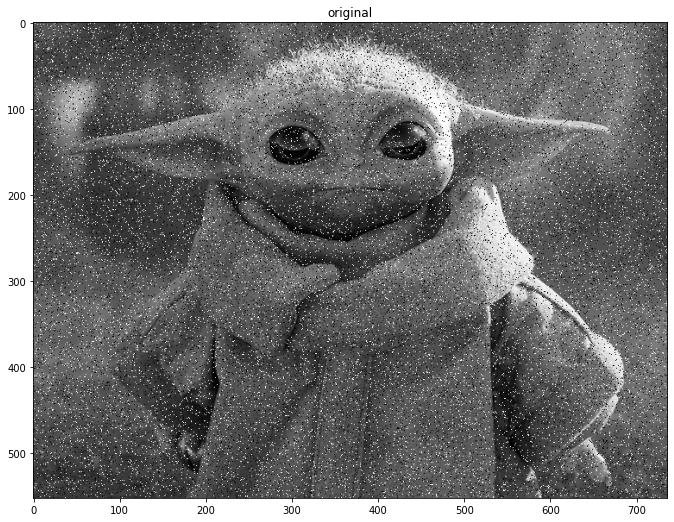

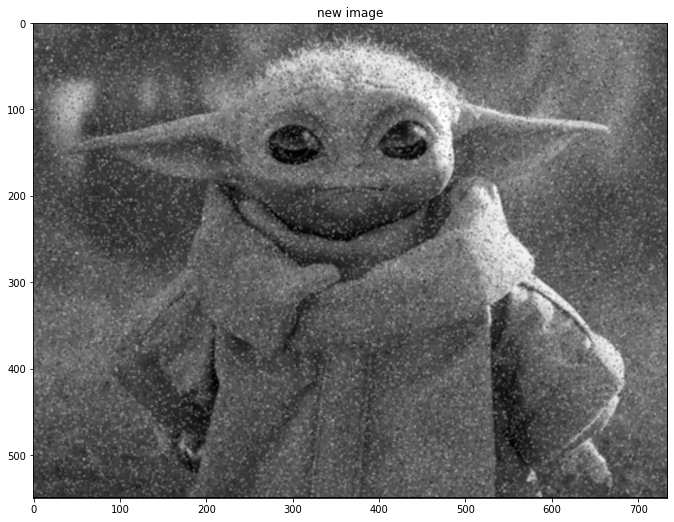

Original size:  (552, 736) 
 New size:  (550, 734)


 Original: 
 [[ 77  78  80 ...  83  83  83]
 [ 81  81 255 ...  83  83  83]
 [ 79  80  80 ...  83  83  83]
 ...
 [ 56  56  55 ...  78  79  79]
 [ 58  57  55 ...  80  78  76]
 [ 58  56  54 ...  85  83  79]] 

 New: 
 [[ 98  99 100 ... 103 102   0]
 [ 98  99 100 ...  83  83   0]
 [ 79  80  82 ... 102  83   0]
 ...
 [ 60  60  52 ...  67  68   0]
 [ 57  56  55 ...  77  69   0]
 [  0   0   0 ...   0   0   0]]


True

In [37]:
def plot_image(image_1, title_1, image_2, title_2):
    plt.figure(figsize = (25,25))
    plt.subplot(121)
    plt.title(title_1)
    plt.imshow(image_1, cmap="gray")

    plt.figure(figsize = (25,25))
    plt.subplot(122)
    plt.title(title_2)
    plt.imshow(image_2, cmap="gray")

    plt.show()
    
plot_image(noisy_image, "original", new_image, "new image")

## Image size
print("Original size: ", noisy_image.shape, "\n", "New size: ", new_image.shape)

## Image array
print("\n\n","Original: \n", noisy_image, "\n\n", "New: \n", new_image)

cv2.imwrite("article_denoise_image_mean.jpeg", new_image)
cv2.imwrite("article_noise_mean.jpeg", noisy_image)